# Task 1: Data Preprocessing


In [1]:
import requests
import tarfile
from io import BytesIO
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import os
from typing import Optional, Tuple
import numpy as np

## 1.1: IMDB Reviews


In [2]:
def fetch_imdb_reviews(download_dir: str):
    """Fetch IMDB Movie Review data and save it to :download_dir:"""

    response = requests.get('http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz')

    # Check if the request was successful (status code 200) and extract the contents to :donwload_dir:
    if response.status_code == 200:

        tar_file = tarfile.open(fileobj=BytesIO(response.content), mode="r:gz")
        tar_file.extractall(path=download_dir)

        tar_file.close()

        print("Extraction completed.")
    else:
        print(f"Failed to download the tar file. Status code: {response.status_code}")

In [3]:
download_dir = './'

fetch_imdb_reviews(download_dir)  # if successful, you should see a new folder called aclImdb in :download_dir:

Extraction completed.


In [4]:
class IMDBMovieReview:
    def __init__(self, id: int, review: str, sentiment: str, rating: float):
        self.id = id                  # id of the sample
        self.review = review          # review
        self.sentiment = sentiment    # sentiment ('pos' or 'neg')
        self.rating = rating          # reviewer rating (1-10)

    def __str__(self) -> str:
      """Overrides default printing for nicer formatting"""
      return f'id: {self.id}\nreview: {self.review}\nrating: {self.rating}\nsentiment:{self.sentiment}'

In [5]:
def load_imdb_reviews(aclImdb_dir: str) -> Tuple[dict, dict]:
    """Load the data from the aclImdb folder into train and test datasets"""

    train_instances = {}
    for sentiment in ['pos', 'neg']:
        for filename in os.listdir(f'{aclImdb_dir}/train/{sentiment}'):
            id_, rating = filename[:-4].split('_')
            with open(f'{aclImdb_dir}/train/{sentiment}/{filename}', 'r') as f:
                review = f.read()

            if sentiment == 'neg':
              id = 12_500 + int(id_)
            else:
              id = int(id_)

            train_instances[id] = IMDBMovieReview(id, review, sentiment, rating=float(rating))

    test_instances = {}
    for sentiment in ['pos', 'neg']:
        for filename in os.listdir(f'{aclImdb_dir}/test/{sentiment}'):
            id_, rating = filename[:-4].split('_')

            with open(f'{aclImdb_dir}/test/{sentiment}/{filename}', 'r') as file:
                review = file.read()

            if sentiment == 'neg':
              id = 12_500 + int(id_)
            else:
              id = int(id_)

            test_instances[id] = IMDBMovieReview(id, review, sentiment, rating=float(rating))

    return train_instances, test_instances

In [6]:
train_instances, test_instances = load_imdb_reviews('./aclImdb')

In [7]:
print(train_instances[0])

id: 0
review: Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!
rating: 9.0
sentiment:pos


In [8]:
import re
# as per recommendation from @freylis, compile once only
CLEANR = re.compile('<.*?>')

def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, ' ', raw_html)
  return cleantext


def toPandasDf(instances):
  reviews_list = []

  for i in range(len(instances)):
    reviews_list.append({"id":instances[i].id,"review":cleanhtml(instances[i].review),"sentiment":instances[i].sentiment,"rating":instances[i].rating})

  return pd.DataFrame(reviews_list).set_index('id')


In [9]:
IMDB_train_df=toPandasDf(train_instances)
IMDB_train_df

,review,sentiment,rating
id,,,
0,Bromwell High is a cartoon comedy. It ran at t...,pos,9.0
1,"If you like adult comedy cartoons, like South ...",pos,7.0
2,Bromwell High is nothing short of brilliant. E...,pos,9.0
3,"""All the world's a stage and its people actors...",pos,10.0
4,FUTZ is the only show preserved from the exper...,pos,8.0
...,...,...,...
24995,"OK, I love bad horror. I especially love horro...",neg,1.0
24996,To be brutally honest... I LOVED watching Seve...,neg,1.0
24997,I'm sure that the folks on the Texas/Louisiana...,neg,4.0


In [10]:
IMDB_test_df=toPandasDf(test_instances)
IMDB_test_df

,review,sentiment,rating
id,,,
0,I went and saw this movie last night after bei...,pos,10.0
1,My boyfriend and I went to watch The Guardian....,pos,10.0
2,My yardstick for measuring a movie's watch-abi...,pos,7.0
3,How many movies are there that you can think o...,pos,7.0
4,This movie was sadly under-promoted but proved...,pos,10.0
...,...,...,...
24995,CyberTracker is set in Los Angeles sometime in...,neg,3.0
24996,Eric Phillips (Don Wilson) is a secret service...,neg,3.0
24997,Plot Synopsis: Los Angeles in the future. Crim...,neg,4.0


In [11]:
#train and test data instances together
IMDB_train_test_df=pd.concat([IMDB_train_df,IMDB_test_df])
IMDB_train_test_df

,review,sentiment,rating
id,,,
0,Bromwell High is a cartoon comedy. It ran at t...,pos,9.0
1,"If you like adult comedy cartoons, like South ...",pos,7.0
2,Bromwell High is nothing short of brilliant. E...,pos,9.0
3,"""All the world's a stage and its people actors...",pos,10.0
4,FUTZ is the only show preserved from the exper...,pos,8.0
...,...,...,...
24995,CyberTracker is set in Los Angeles sometime in...,neg,3.0
24996,Eric Phillips (Don Wilson) is a secret service...,neg,3.0
24997,Plot Synopsis: Los Angeles in the future. Crim...,neg,4.0


### Filter Out Redundant Words

In [12]:
def my_tokenizer(text):
    # create a space between special characters
    text=re.sub("(\!|\?)"," \\1 ",text)
    text=re.sub("(\.|\(|\)|\,|\:|\;|\"|\/|\'|\*|\«|\»|\-|\¡|\§|\_|\?|\[0-9])"," ",text)

    # split based on whitespace
    return re.split("\\s+",text)

reviews_text_list=IMDB_train_test_df['review'].tolist()

# ignore terms that appeared in less than 1% and more than 50%
coun_vect = CountVectorizer(min_df=0.01,max_df=0.5,tokenizer=my_tokenizer)
count_matrix = coun_vect.fit_transform(reviews_text_list)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [13]:
#stopwords and rare words
imdb_stopwords_df=pd.DataFrame(coun_vect.stop_words_,columns=["words"])
imdb_stopwords_df

,words
0,
1,flirts
2,gertrúdix
3,unmasterfully
4,ramos
...,...
103285,denigrated
103286,replicant
103287,testosterone
103288,mercutio


In [14]:
#with stopwords and rarewords removed
imdb_vocab_df=pd.DataFrame(coun_vect.vocabulary_.keys(),columns=["words"])
imdb_vocab_df

,words
0,high
1,cartoon
2,comedy
3,same
4,time
...,...
1791,lacks
1792,holes
1793,scientist
1794,sucks


In [15]:
#all vocab
aclImdb_dir='./aclImdb'
filename='imdb.vocab'
with open(f'{aclImdb_dir}/{filename}', 'r') as f:
    review = f.read()
imdb_all_vocab_df=pd.DataFrame(review.split('\n'),columns=['words'])
imdb_all_vocab_df

,words
0,the
1,and
2,a
3,of
4,to
...,...
89522,copywrite
89523,artbox
89524,kinky-sex
89525,urrrghhh


In [16]:
#intersection that is inside all vocabulary and after stopwords and rarewords have been dropped
keys=["words"]
intersection = imdb_all_vocab_df.merge(imdb_vocab_df[keys], on=keys)
intersection

,words
0,he
1,his
2,!
3,by
4,an
...,...
1763,wasn
1764,couldn
1765,hasn
1766,wouldn


In [17]:
f_to_extract=intersection["words"].tolist()

IMDB_potential_features = {key: coun_vect.vocabulary_[key] for key in f_to_extract}
#list(IMDB_potential_features.keys())

In [18]:
IMDB_df=pd.DataFrame(count_matrix.toarray(),columns=coun_vect.get_feature_names_out())[list(IMDB_potential_features.keys())]
IMDB_df

,he,his,!,by,an,who,they,from,so,like,...,didn,pre,doesn,haven,isn,wasn,couldn,hasn,wouldn,shouldn
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,1,0,3,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,2,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,4,3,0,3,1,2,0,2,0,3,...,1,0,3,0,1,0,0,0,0,0
49996,1,1,0,2,0,1,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
49997,0,3,0,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,2,0,2,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [19]:
#drop more famous stopwords
default_stopwords=['call', 'still', 'nevertheless', 'down', 'every', 'forty', '‘re', 'always', 'whole', 'side', "n't", 'now', 'however', 'an', 'show', 'least', 'give', 'below', 'did', 'sometimes', 'which', "'s", 'nowhere', 'per', 'hereupon', 'yours', 'she', 'moreover', 'eight', 'somewhere', 'within', 'whereby', 'few', 'has', 'so', 'have', 'for', 'noone', 'top', 'were', 'those', 'thence', 'eleven', 'after', 'no', '’ll', 'others', 'ourselves', 'themselves', 'though', 'that', 'nor', 'just', '’s', 'before', 'had', 'toward', 'another', 'should', 'herself', 'and', 'these', 'such', 'elsewhere', 'further', 'next', 'indeed', 'bottom', 'anyone', 'his', 'each', 'then', 'both', 'became', 'third', 'whom', '‘ve', 'mine', 'take', 'many', 'anywhere', 'to', 'well', 'thereafter', 'besides', 'almost', 'front', 'fifteen', 'towards', 'none', 'be', 'herein', 'two', 'using', 'whatever', 'please', 'perhaps', 'full', 'ca', 'we', 'latterly', 'here', 'therefore', 'us', 'how', 'was', 'made', 'the', 'or', 'may', '’re', 'namely', "'ve", 'anyway', 'amongst', 'used', 'ever', 'of', 'there', 'than', 'why', 'really', 'whither', 'in', 'only', 'wherein', 'last', 'under', 'own', 'therein', 'go', 'seems', '‘m', 'wherever', 'either', 'someone', 'up', 'doing', 'on', 'rather', 'ours', 'again', 'same', 'over', '‘s', 'latter', 'during', 'done', "'re", 'put', "'m", 'much', 'neither', 'among', 'seemed', 'into', 'once', 'my', 'otherwise', 'part', 'everywhere', 'never', 'myself', 'must', 'will', 'am', 'can', 'else', 'although', 'as', 'beyond', 'are', 'too', 'becomes', 'does', 'a', 'everyone', 'but', 'some', 'regarding', '‘ll', 'against', 'throughout', 'yourselves', 'him', "'d", 'it', 'himself', 'whether', 'move', '’m', 'hereafter', 're', 'while', 'whoever', 'your', 'first', 'amount', 'twelve', 'serious', 'other', 'any', 'off', 'seeming', 'four', 'itself', 'nothing', 'beforehand', 'make', 'out', 'very', 'already', 'various', 'until', 'hers', 'they', 'not', 'them', 'where', 'would', 'since', 'everything', 'at', 'together', 'yet', 'more', 'six', 'back', 'with', 'thereupon', 'becoming', 'around', 'due', 'keep', 'somehow', 'n‘t', 'across', 'all', 'when', 'i', 'empty', 'nine', 'five', 'get', 'see', 'been', 'name', 'between', 'hence', 'ten', 'several', 'from', 'whereupon', 'through', 'hereby', "'ll", 'alone', 'something', 'formerly', 'without', 'above', 'onto', 'except', 'enough', 'become', 'behind', '’d', 'its', 'most', 'n’t', 'might', 'whereas', 'anything', 'if', 'her', 'via', 'fifty', 'is', 'thereby', 'twenty', 'often', 'whereafter', 'their', 'also', 'anyhow', 'cannot', 'our', 'could', 'because', 'who', 'beside', 'by', 'whence', 'being', 'meanwhile', 'this', 'afterwards', 'whenever', 'mostly', 'what', 'one', 'nobody', 'seem', 'less', 'do', '‘d', 'say', 'thus', 'unless', 'along', 'yourself', 'former', 'thru', 'he', 'hundred', 'three', 'sixty', 'me', 'sometime', 'whose', 'you', 'quite', '’ve', 'about', 'even']
IMDB_df.columns.tolist()
to_remove=[value for value in IMDB_df.columns.tolist() if value in default_stopwords]
len(to_remove)
#one-hot-encoding dataframe for IMDB data
IMDB_df = IMDB_df.drop(columns=to_remove)
IMDB_df

,!,like,good,time,story,people,bad,great,way,movies,...,didn,pre,doesn,haven,isn,wasn,couldn,hasn,wouldn,shouldn
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,3,3,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,2,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,3,1,1,1,0,2,0,1,0,...,1,0,3,0,1,0,0,0,0,0
49996,0,0,0,0,1,0,0,0,2,0,...,0,0,0,0,1,0,0,0,0,0
49997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,2,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [20]:
IMDB_df[:25000]

,!,like,good,time,story,people,bad,great,way,movies,...,didn,pre,doesn,haven,isn,wasn,couldn,hasn,wouldn,shouldn
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,3,3,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,2,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,9,1,1,1,0,0,3,0,1,1,...,1,0,1,0,0,0,0,0,1,0
24996,1,2,0,0,2,1,1,0,0,0,...,0,0,2,0,0,0,0,0,0,0
24997,0,3,2,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
24998,1,0,3,0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Simple Linear Regression for Features Selection

In [21]:
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')

In [22]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1
        #alternatively: self.w = np.linalg.inv(x.T @ x)@x.T@y
        self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference
        return self

    def predict(self, x):
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w                             #predict the y values
        return yh

In [23]:
import numpy as np
f_to_evaluate=list(IMDB_df.columns)
coef_dict={}
for f in f_to_evaluate:
  #change to 0 and 1
  #x=np.array([1 if j > 0 else 0 for j in IMDB_df[0:25000][f].tolist()])
  x=np.array(IMDB_df[0:25000][f].tolist())
  y=np.array(IMDB_train_df['rating'].tolist())
  N=25000
  model = LinearRegression()
  yh = model.fit(x,y).predict(x)

  '''
  plt.plot(x, y, '.')
  plt.plot(x, yh, 'g-', alpha=.5)
  plt.xlabel('x')
  plt.ylabel(r'$y=w0 + w_1x$')
  # plt.show()'''
  #plt.savefig('figures/LinearRegression/lr_1d.png', bbox_inches="tight", dpi=300)
  coef_dict[f]=list(model.w)

IMDB_coef_df=pd.DataFrame(coef_dict).T
IMDB_coef_df.columns=['w1','w0']

In [24]:
#top 1000 features
temp_df1=IMDB_coef_df.sort_values('w1',ascending=True).iloc[0:500]
temp_df2=IMDB_coef_df.sort_values('w1',ascending=False).iloc[0:500]
IMDB_coef_df = pd.concat([temp_df1,temp_df2])

In [25]:
#sort by smallest to largest coefficient
IMDB_coef_df.sort_values('w1',ascending=True)

,w1,w0
redeeming,-2.911243,5.515683
waste,-2.779330,5.639699
laughable,-2.532710,5.520675
pointless,-2.515394,5.528430
pathetic,-2.478468,5.524117
...,...,...
touching,2.106309,5.441070
outstanding,2.112937,5.442392
superb,2.247060,5.417409
beautifully,2.335691,5.436986


The above table shows words with really negative coefficients to very positive coefficients. Words with very negative coefficients are most associated with low rating score. The top negative words are "redeeming", "waste", "laughable", "pointless", and "pathetic". In fact, they make sense for calling a movie bad since they are all very negative connoted words.

In [26]:
#sort by largest to smallest coefficient
IMDB_coef_df.sort_values('w1',ascending=False)

,w1,w0
wonderfully,2.513718,5.445142
beautifully,2.335691,5.436986
superb,2.247060,5.417409
outstanding,2.112937,5.442392
touching,2.106309,5.441070
...,...,...
pathetic,-2.478468,5.524117
pointless,-2.515394,5.528430
laughable,-2.532710,5.520675
waste,-2.779330,5.639699


The above table shows words from really positive coefficients to very negative coefficients. Words with very positive coefficients are most associated with high rating score. The top positive words are "wonderfully", "beautifully", "superb", "outstanding", and "touching". In fact, they make sense for calling a movie good since they are all very positive connoted words.

### One-Hot-Encoding Dataframe

In [27]:
#IMDB one-hot-encoding dataframe
IMDB_df=IMDB_df[list(IMDB_coef_df.sort_values('w1',ascending=False).index)]
#add target category to the dataframe for further purposes
temp = list(map(lambda x: 1 if x == 'pos' else 0, list(IMDB_train_test_df['sentiment'])))
IMDB_df["sentiment"]=temp
IMDB_df

,wonderfully,beautifully,superb,outstanding,touching,magnificent,wonderful,gem,fantastic,recommended,...,wasted,avoid,worst,garbage,pathetic,pointless,laughable,waste,redeeming,sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
49996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


## 1.2: 20 New Groups

In [28]:
from sklearn.datasets import fetch_20newsgroups

categories=['rec.sport.baseball','soc.religion.christian','sci.crypt','comp.windows.x','talk.politics.guns']
# Load the dataset with desired categories and remove headers, footer, and quotes:
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))


In [29]:
fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes')).target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [30]:
newsgroups_train_df=pd.DataFrame({'news':newsgroups_train.data,'category':newsgroups_train.target})
newsgroups_train_df

,news,category
0,"I Love it how all of these people are ""blaming...",1
1,One of the candidates that has been suggested ...,2
2,: I've been thinking about how difficult it...,2
3,I hear George Bush (remember him?) will receiv...,0
4,Please realize that I am frequently getting in...,3
...,...,...
2925,"Excerpts from the Clipper announcement, with s...",2
2926,"First, I would like to say how much I apprecia...",4
2927,\n The same Bill James? Why do you say that? ...,1
2928,"[...]\n\nShouldn't this read ""Braves Hitters a...",1


In [31]:
newsgroups_test_df=pd.DataFrame({'news':newsgroups_test.data,'category':newsgroups_test.target})
newsgroups_test_df

,news,category
0,\nBut the NSA will not be doing any wiretappin...,2
1,\nNeither. \n\n\nYou don't have to pay attent...,4
2,[Someone quoted the following. I've removed t...,3
3,"\nto take this to its, er, ""logical"" conclusio...",1
4,"Boston Globe, Wednesday April 21 1993\n\ncol. ...",4
...,...,...
1945,"\n\nYes, that's him. Was I not specific enoug...",1
1946,"\n\nOkay, I'm curious. Why? Are you expectin t...",1
1947,,3
1948,"\nSorry, that's a feature. The ICCCM specifie...",0


In [32]:
newsgroups_train_test_df=pd.concat([newsgroups_train_df,newsgroups_test_df])
newsgroups_train_test_df

,news,category
0,"I Love it how all of these people are ""blaming...",1
1,One of the candidates that has been suggested ...,2
2,: I've been thinking about how difficult it...,2
3,I hear George Bush (remember him?) will receiv...,0
4,Please realize that I am frequently getting in...,3
...,...,...
1945,"\n\nYes, that's him. Was I not specific enoug...",1
1946,"\n\nOkay, I'm curious. Why? Are you expectin t...",1
1947,,3
1948,"\nSorry, that's a feature. The ICCCM specifie...",0


### Filter Out Redundant Words

The code below will allow to filter out irrelevant words such as stop words and rare words.

In [33]:
def my_tokenizer(text):
    # create a space between special characters
    text=re.sub("(\!|\?)"," \\1 ",text)
    text=re.sub("(\.|\(|\)|\,|\:|\;|\"|\/|\'|\*|\«|\»|\-|\?|\¡|\§|\_|\[0-9])"," ",text)

    # split based on whitespace
    return re.split("\\s+",text)

newsgroups_text_list=newsgroups_train_test_df['news'].tolist()

# ignore terms that appeared in less than 1% and more than 50%
newsgroups_coun_vect = CountVectorizer(min_df=0.01,max_df=0.50,tokenizer=my_tokenizer)
newsgroups_count_matrix=newsgroups_coun_vect.fit_transform(newsgroups_text_list)

In [34]:
#stopwords and rare words
newsgroups_stopwords_df=newsgroups_coun_vect.stop_words_
pd.DataFrame(newsgroups_stopwords_df)

,0
0,
1,indent
2,cpg
3,part18
4,pelted
...,...
52341,>initialize
52342,xfeatures
52343,corba
52344,10010111


In [35]:
#with stopwords and rarewords removed
newsgroups_vocab_df=pd.DataFrame(newsgroups_coun_vect.vocabulary_.keys(),columns=["words"])
newsgroups_vocab_df

,words
0,love
1,how
2,all
3,these
4,people
...,...
1626,com>
1627,month
1628,host
1629,fourth


In [36]:
#drop more famous stopwords
default_stopwords=['call', 'still', 'nevertheless', 'down', 'every', 'forty', '‘re', 'always', 'whole', 'side', "n't", 'now', 'however', 'an', 'show', 'least', 'give', 'below', 'did', 'sometimes', 'which', "'s", 'nowhere', 'per', 'hereupon', 'yours', 'she', 'moreover', 'eight', 'somewhere', 'within', 'whereby', 'few', 'has', 'so', 'have', 'for', 'noone', 'top', 'were', 'those', 'thence', 'eleven', 'after', 'no', '’ll', 'others', 'ourselves', 'themselves', 'though', 'that', 'nor', 'just', '’s', 'before', 'had', 'toward', 'another', 'should', 'herself', 'and', 'these', 'such', 'elsewhere', 'further', 'next', 'indeed', 'bottom', 'anyone', 'his', 'each', 'then', 'both', 'became', 'third', 'whom', '‘ve', 'mine', 'take', 'many', 'anywhere', 'to', 'well', 'thereafter', 'besides', 'almost', 'front', 'fifteen', 'towards', 'none', 'be', 'herein', 'two', 'using', 'whatever', 'please', 'perhaps', 'full', 'ca', 'we', 'latterly', 'here', 'therefore', 'us', 'how', 'was', 'made', 'the', 'or', 'may', '’re', 'namely', "'ve", 'anyway', 'amongst', 'used', 'ever', 'of', 'there', 'than', 'why', 'really', 'whither', 'in', 'only', 'wherein', 'last', 'under', 'own', 'therein', 'go', 'seems', '‘m', 'wherever', 'either', 'someone', 'up', 'doing', 'on', 'rather', 'ours', 'again', 'same', 'over', '‘s', 'latter', 'during', 'done', "'re", 'put', "'m", 'much', 'neither', 'among', 'seemed', 'into', 'once', 'my', 'otherwise', 'part', 'everywhere', 'never', 'myself', 'must', 'will', 'am', 'can', 'else', 'although', 'as', 'beyond', 'are', 'too', 'becomes', 'does', 'a', 'everyone', 'but', 'some', 'regarding', '‘ll', 'against', 'throughout', 'yourselves', 'him', "'d", 'it', 'himself', 'whether', 'move', '’m', 'hereafter', 're', 'while', 'whoever', 'your', 'first', 'amount', 'twelve', 'serious', 'other', 'any', 'off', 'seeming', 'four', 'itself', 'nothing', 'beforehand', 'make', 'out', 'very', 'already', 'various', 'until', 'hers', 'they', 'not', 'them', 'where', 'would', 'since', 'everything', 'at', 'together', 'yet', 'more', 'six', 'back', 'with', 'thereupon', 'becoming', 'around', 'due', 'keep', 'somehow', 'n‘t', 'across', 'all', 'when', 'i', 'empty', 'nine', 'five', 'get', 'see', 'been', 'name', 'between', 'hence', 'ten', 'several', 'from', 'whereupon', 'through', 'hereby', "'ll", 'alone', 'something', 'formerly', 'without', 'above', 'onto', 'except', 'enough', 'become', 'behind', '’d', 'its', 'most', 'n’t', 'might', 'whereas', 'anything', 'if', 'her', 'via', 'fifty', 'is', 'thereby', 'twenty', 'often', 'whereafter', 'their', 'also', 'anyhow', 'cannot', 'our', 'could', 'because', 'who', 'beside', 'by', 'whence', 'being', 'meanwhile', 'this', 'afterwards', 'whenever', 'mostly', 'what', 'one', 'nobody', 'seem', 'less', 'do', '‘d', 'say', 'thus', 'unless', 'along', 'yourself', 'former', 'thru', 'he', 'hundred', 'three', 'sixty', 'me', 'sometime', 'whose', 'you', 'quite', '’ve', 'about', 'even']
newsgroups_vocab_df=newsgroups_vocab_df[~newsgroups_vocab_df['words'].isin(default_stopwords)]
newsgroups_vocab_df

,words
0,love
4,people
7,weak
8,division
10,don
...,...
1626,com>
1627,month
1628,host
1629,fourth


For further analysis, we will transform the dataframe into one-hot-encoding dataframe.

In [37]:
#one-hot-encoding dataframe for news groups data
newsgroups_df=pd.DataFrame(newsgroups_count_matrix.toarray(),columns=newsgroups_coun_vect.get_feature_names_out())[list(newsgroups_vocab_df['words'])]
#add target category to the dataframe for further purposes
newsgroups_df["category"]=list(newsgroups_train.target)+list(newsgroups_test.target)
newsgroups_df

,love,people,weak,division,don,t,look,record,teams,read,...,edu>,separate,greatly,heart,com>,month,host,fourth,pitch,category
0,1,1,1,4,1,1,1,1,2,1,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,5,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4878,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Mutual Information for Features Selection

We will compute mutual info scores for each feature/word of the five classes chosen ('rec.sport.baseball','soc.religion.christian','sci.crypt','comp.windows.x','talk.politics.guns'). The higher the mutual score of a feature, the more important a feature is to a class.

comp.windows.x class:

In [38]:
#categories=['rec.sport.baseball','soc.religion.christian','sci.crypt','comp.windows.x','talk.politics.guns']
from sklearn.metrics import mutual_info_score

#comp.windows.x
mu_scores={}
for f in list(newsgroups_df.columns[:-1]):
  l1=list(map(lambda x: 1 if x > 0 else 0, list(newsgroups_df[f])[:2930]))
  l2=list(map(lambda x: 1 if x == 0 else 0, list(newsgroups_df['category'])[:2930]))
  score=mutual_info_score(l2,l1)
  mu_scores[f]=score

window_mscores_df=pd.DataFrame({"scores":mu_scores}).sort_values("scores",ascending=False)
window_mscores_df

,scores
x,1.133746e-01
window,7.546970e-02
motif,5.082172e-02
server,4.155370e-02
windows,4.136064e-02
...,...
apply,1.003492e-07
etc,6.347759e-08
number,6.108078e-08
runs,3.678394e-08


rec.sport.baseball class:

In [39]:
#rec.sport.baseball
mu_scores={}
for f in list(newsgroups_df.columns[:-1]):
  l1=list(map(lambda x: 1 if x > 0 else 0, list(newsgroups_df[f])[:2930]))
  l2=list(map(lambda x: 1 if x == 1 else 0, list(newsgroups_df['category'])[:2930]))
  score=mutual_info_score(l2,l1)
  mu_scores[f]=score

baseball_mscores_df=pd.DataFrame({"scores":mu_scores}).sort_values("scores",ascending=False)
baseball_mscores_df

,scores
team,4.362280e-02
baseball,4.191105e-02
games,4.151123e-02
game,3.969478e-02
season,3.961385e-02
...,...
18,1.278379e-07
bill,3.018783e-08
23,8.415224e-09
mailing,5.615226e-09


sci.crypt class:

In [40]:
#sci.crypt
mu_scores={}
for f in list(newsgroups_df.columns[:-1]):
  l1=list(map(lambda x: 1 if x > 0 else 0, list(newsgroups_df[f])[:2930]))
  l2=list(map(lambda x: 1 if x == 2 else 0, list(newsgroups_df['category'])[:2930]))
  score=mutual_info_score(l2,l1)
  mu_scores[f]=score

crypt_mscores_df=pd.DataFrame({"scores":mu_scores}).sort_values("scores",ascending=False)
crypt_mscores_df

,scores
encryption,9.808154e-02
clipper,9.036845e-02
key,8.822887e-02
chip,7.644812e-02
nsa,5.984638e-02
...,...
lack,5.353484e-08
difference,4.354180e-08
al,2.233701e-09
sources,2.233701e-09


soc.religion.christian class:

In [41]:
#soc.religion.christian
mu_scores={}
for f in list(newsgroups_df.columns[:-1]):
  l1=list(map(lambda x: 1 if x > 0 else 0, list(newsgroups_df[f])[:2930]))
  l2=list(map(lambda x: 1 if x == 3 else 0, list(newsgroups_df['category'])[:2930]))
  score=mutual_info_score(l2,l1)
  mu_scores[f]=score

christian_mscores_df=pd.DataFrame({"scores":mu_scores}).sort_values("scores",ascending=False)
christian_mscores_df

,scores
god,1.560627e-01
jesus,8.932456e-02
bible,7.330839e-02
christians,7.270099e-02
christ,7.020040e-02
...,...
write,1.594583e-07
soon,8.527940e-08
tim,7.528337e-08
quick,7.528337e-08


talk.politics.guns class:

In [42]:
#talk.politics.guns
mu_scores={}
for f in list(newsgroups_df.columns[:-1]):
  l1=list(map(lambda x: 1 if x > 0 else 0, list(newsgroups_df[f])[:2930]))
  l2=list(map(lambda x: 1 if x == 4 else 0, list(newsgroups_df['category'])[:2930]))
  score=mutual_info_score(l2,l1)
  mu_scores[f]=score

guns_mscores_df=pd.DataFrame({"scores":mu_scores}).sort_values("scores",ascending=False)
guns_mscores_df

,scores
gun,8.535971e-02
guns,5.907447e-02
weapons,4.288118e-02
firearms,3.579928e-02
fire,2.763245e-02
...,...
immediately,4.823804e-08
conference,4.154586e-08
allow,9.074978e-09
peace,4.469934e-09


Top 50 features chosen by mutual info score technique:

In [43]:
newsgroups_features_df=pd.concat([christian_mscores_df[:10],guns_mscores_df[:10],crypt_mscores_df[:10],window_mscores_df[:10],baseball_mscores_df[:10]])
newsgroups_features_df

,scores
god,0.156063
jesus,0.089325
bible,0.073308
christians,0.072701
christ,0.070200
christian,0.067657
church,0.062487
christianity,0.046625
faith,0.046343
lord,0.032792


### One-Hot-Encoding Dataframe

The below table is the one-hot-encoding dataframe for further analysis.

In [44]:
newsgroups_df=newsgroups_df[list(newsgroups_features_df.index)+["category"]]
newsgroups_df

,god,jesus,bible,christians,christ,christian,church,christianity,faith,lord,...,baseball,games,game,season,players,league,pitching,year,braves,category
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,7,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Task 2: Implement Logistic and Multiclass Classifiers

### Logistic Regression Class

In [45]:
def gradient(self, x, y):
    N,D = x.shape
    yh = logistic(np.dot(x, self.w))    # predictions  size N
    grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
    return grad                         # size D

logistic = lambda z: 1./ (1 + np.exp(-z))       #logistic function
class LogisticRegression:

    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose

    def gradient(self, x, y):
        N,D = x.shape
        yh = logistic(np.dot(x, self.w))    # predictions  size N
        grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
        return grad

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            self.w = self.w - self.learning_rate * g
            t += 1

        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh

# LogisticRegression.gradient = gradient             #initialize the gradient method of the LogisticRegression class with gradient function

### Multiclass Regression Class

In [46]:
import random
random.seed(551)
class Multinomial_logistic:
    def __init__(self, nFeatures, nClasses):
        self.W = np.random.rand(nFeatures, nClasses)*5

    def predict(self, X):
        y_pred = np.exp(np.matmul(X, self.W))

        s_pred=y_pred.sum(axis=1).reshape(X.shape[0], 1)

        #division by 0
        if s_pred.any(0):
          s_pred[s_pred==0]=1

        t = y_pred=y_pred/(s_pred+1e-5)
        if np.isnan(t).any():
          t[np.isnan(t)]=1

        return t

    def grad(self, X, y):
        gradient=np.matmul(X.transpose(), self.predict(X) - y)
        if np.isnan(gradient).any():
          gradient[np.isnan(gradient)]=1e-5
        return gradient

    def ce(self, X, y):
        pred=self.predict(X)
        t=np.log(pred)
        y_t=y*t
        if np.isnan(y_t).any():
          y_t[np.isnan(y_t)]=1e-5
        return -np.sum(y_t)

    # modify it to add stopping criteria (what can you think of?)
    def fit(self, X, y, X_valid=None, y_valid=None, lr=0.005, niter=100):
        losses_train = np.zeros(niter)
        losses_valid = np.zeros(niter)
        for i in range(niter):
            self.W = self.W - lr * self.grad(X, y)
            loss_train = self.ce(X, y)
            losses_train[i] = loss_train
            if X_valid is not None and y_valid is not None:
                loss_valid = self.ce(X_valid, y_valid)
                losses_valid[i] = loss_valid
                print(f"iter {i}: {loss_train:.3f}; {loss_valid:.3f}")
            else:
                print(f"iter {i}: {loss_train:.3f}")
        return losses_train, losses_valid

    def check_grad(self, X, y):
        N, C = y.shape
        D = X.shape[1]

        diff = np.zeros((D, C))

        W = self.W.copy()

        for i in range(D):
            for j in range(C):
                epsilon = np.zeros((D, C))
                epsilon[i, j] = np.random.rand() * 1e-4

                self.W = self.W + epsilon
                J1 = self.ce(X, y)
                self.W = W

                self.W = self.W - epsilon
                J2 = self.ce(X, y)
                self.W = W

                numeric_grad = (J1 - J2) / (2 * epsilon[i, j])
                derived_grad = self.grad(X, y)[i, j]

                diff[i, j] = np.square(derived_grad - numeric_grad).sum() / \
                             np.square(derived_grad + numeric_grad).sum()

        # print(diff)
        return diff.sum()

## Gradient Verification
Please see section Task 3 :)

# Task 3: Run Experiments

## Binary Classification on IMDB Data

### Top Features by Simple Linear Regression

The table below shows the top 10 features with the most negative coefficients.

In [47]:
#sort by smallest to largest coefficient
sortN=IMDB_coef_df.sort_values('w1',ascending=True)[:10]
sortN

,w1,w0
redeeming,-2.911243,5.515683
waste,-2.779330,5.639699
laughable,-2.532710,5.520675
pointless,-2.515394,5.528430
pathetic,-2.478468,5.524117
garbage,-2.376965,5.521456
worst,-2.366861,5.736181
avoid,-2.362693,5.551058
wasted,-2.272634,5.528627
excuse,-2.249361,5.515419


The table below shows the top 10 features with the most positive coefficients.

In [48]:
#sort by greatest to smallest coefficient
sortP=IMDB_coef_df.sort_values('w1',ascending=False)[:10]
sortP

,w1,w0
wonderfully,2.513718,5.445142
beautifully,2.335691,5.436986
superb,2.247060,5.417409
outstanding,2.112937,5.442392
touching,2.106309,5.441070
magnificent,2.092114,5.455962
wonderful,1.966728,5.347287
gem,1.899381,5.450293
fantastic,1.863835,5.418301
recommended,1.827402,5.441976


<Axes: title={'center': 'Top 20 IMDB Features by Linear Regression'}, xlabel='Effect Size', ylabel='Features'>

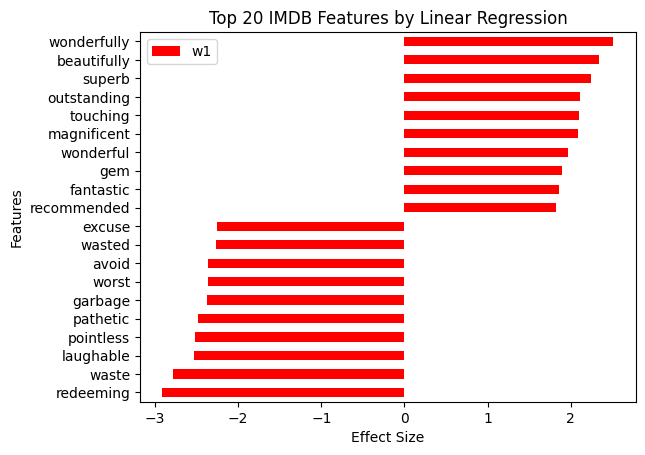

In [49]:
#horizontal bar plot of top 20 features
Linear_sort=pd.DataFrame(pd.concat([sortN,sortP])['w1']).sort_values("w1")
Linear_sort
Linear_sort.plot(kind='barh',color = "red",title="Top 20 IMDB Features by Linear Regression", xlabel = "Effect Size", ylabel = "Features")



The plot above shows the 20 features computed by simple linear regression for IMDB reviews dataset. Features with the most positive coefficients are the ones that describe good movies, and features with the most negative coefficients are the ones that describe bad movies.

### Top Features by Logistic Regression

In [50]:
from sklearn import model_selection
import pandas as pd
from sklearn.preprocessing import StandardScaler

#whole train set
IMDB_X_train=IMDB_df.iloc[:,:-1][:25000]
IMDB_X_train=StandardScaler().fit(IMDB_X_train).transform(IMDB_X_train)
IMDB_y_train=IMDB_df['sentiment'][:25000].values

#whole test set
IMDB_X_test=IMDB_df.iloc[:,:-1][25000:]
IMDB_X_test=StandardScaler().fit(IMDB_X_test).transform(IMDB_X_test)
IMDB_y_test=IMDB_df['sentiment'][25000:].values

logitreg = LogisticRegression(max_iters=1e3)
fit = logitreg.fit(IMDB_X_train, IMDB_y_train)
effect_size = pd.DataFrame(fit.w[:(len(fit.w)-1)]).transpose() # linear coefficents
# effect_size.shape
effect_size.columns = IMDB_df.columns[:-1]
effect_size=effect_size.T
effect_size.columns=["w1"]
#(effect_size.T).sort_values(0).plot(kind='barh')

<Axes: title={'center': 'Top 20 IMDB Features by Logistic Regression'}, xlabel='Effect Size', ylabel='Features'>

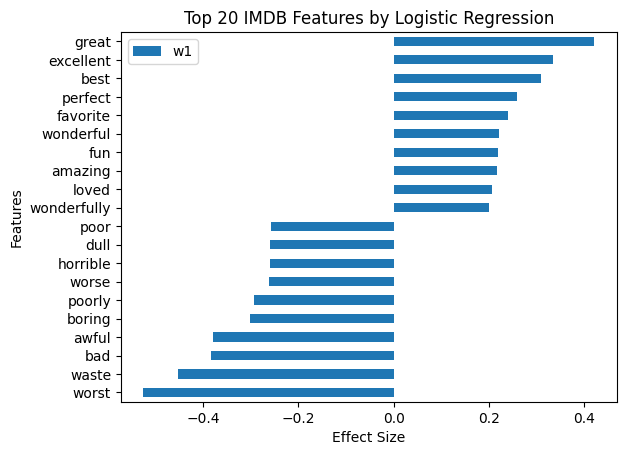

In [51]:
logistic_coef=pd.concat([(effect_size).sort_values("w1",ascending=True)[:10],(effect_size).sort_values("w1",ascending=False)[:10]]).sort_values("w1")
logistic_coef.plot(kind="barh",title="Top 20 IMDB Features by Logistic Regression", xlabel = "Effect Size", ylabel = "Features")

The plot above shows the 20 features computed by simple logistic regression for IMDB reviews dataset. Features with the most positive coefficients are the ones that describe good movies, and features with the most negative coefficients are the ones that describe bad movies. However, we can see that these features are not exactly the ones that was computed by simple linear regression(i.e. they are different). But, the words/features used to describe good or bad movies all make sense.

### Gradient Verification

First, we have to verify the gradient by the below code:

<Figure size 640x480 with 0 Axes>

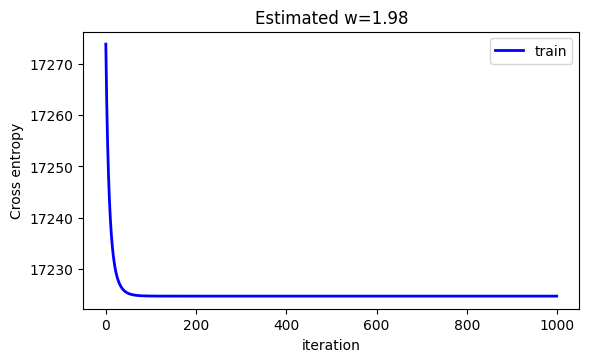

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection

temp_IMDB_x_train=IMDB_df.iloc[:,:-1][:25000].iloc[:,0].to_numpy()
temp_IMDB_x_test=IMDB_df.iloc[:,:-1][25000:].iloc[:,0].to_numpy()

IMDB_x_va, IMDB_x_out, IMDB_y_va, IMDB_y_out = model_selection.train_test_split(temp_IMDB_x_test,IMDB_y_test,test_size = 0.6, random_state=1, shuffle=True)

# monitor loss
lr = 0.001
niter = 1000
ce_all = np.zeros(niter)
ce_all_va = np.zeros(niter)
w = np.random.randn(1)
w_va = np.random.randn(1)
w_va= np.random.randn(1)
w0 = w

for i in range(niter):
    a = w * temp_IMDB_x_train
    ce_all[i] = np.sum(IMDB_y_train * np.log1p(np.exp(-a)) + (1-IMDB_y_train) * np.log1p(np.exp(a))) # cross-entropy
    y_hat = 1 / (1 + np.exp(-a))
    dw = np.sum((y_hat - IMDB_y_train) * temp_IMDB_x_train)
    w = w - lr * dw
'''
    a_va = w_va * IMDB_x_va
    ce_all_va[i] = np.sum(IMDB_y_va * np.log1p(np.exp(-a_va)) + (1-IMDB_y_va) * np.log1p(np.exp(a_va))) # cross-entropy
    y_hat_va = 1 / (1 + np.exp(-a_va))
    dw_va = np.sum((y_hat_va - IMDB_y_va) * IMDB_x_va)
    w_va = w_va - lr * dw_va'''


plt.clf()
plt.figure(figsize=((16/9)*3.6,3.6))
plt.plot(ce_all,"b-", lw=2, label="train")
#plt.plot(ce_all_va,"r-",lw=2,label="valid")
plt.ylabel("Cross entropy")
plt.xlabel("iteration")
plt.legend()
# plt.title(f"True w={w_true}; Estimated w={round(w.astype(float)[0],2)}")
plt.title(f"Estimated w={round(w.astype(float)[0],2)}")
# plt.show()
plt.savefig('ce_iteration.png', bbox_inches="tight", dpi=300)

The above plot shows that both the training error curves continue to decrease, therefore the gradient calculation and loss function are good. Thus, we have verified the gradient. Furthermore, we can also plot validation error to check for potential overfitting if desired.

### AUROC/ROC Plot

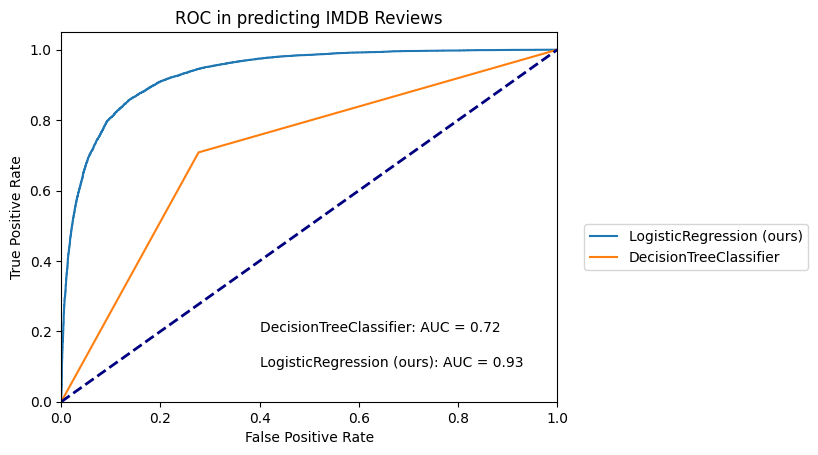

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
#from sklearn.linear_model import LogisticRegression as sk_LogisticRegression
from sklearn.tree import DecisionTreeClassifier

models = [DecisionTreeClassifier()]

perf = {}

# our implementation is slow you may try sklearn version
logitreg = LogisticRegression(max_iters=1e3)
fit = logitreg.fit(IMDB_X_train, IMDB_y_train)
y_test_prob = fit.predict(IMDB_X_test)
fpr, tpr, _ = roc_curve(IMDB_y_test, y_test_prob)
auroc = roc_auc_score(IMDB_y_test, y_test_prob)
perf["LogisticRegression (ours)"] = {'fpr':fpr, 'tpr':tpr, 'auroc':auroc}

for model in models:
    fit = model.fit(IMDB_X_train, IMDB_y_train)
    y_test_prob = fit.predict_proba(IMDB_X_test)[:,1]
    fpr, tpr, _ = roc_curve(IMDB_y_test, y_test_prob)
    auroc = roc_auc_score(IMDB_y_test, y_test_prob)
    if type(model).__name__ == "LogisticRegression":
        perf["LogisticRegression (sklearn)"] = {'fpr':fpr,'tpr':tpr,'auroc':auroc}
    else:
        perf[type(model).__name__] = {'fpr':fpr,'tpr':tpr,'auroc':auroc}


plt.clf()
i = 0
for model_name, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'],label=model_name)
    plt.text(0.4, i+0.1, model_name + ': AUC = '+ str(round(model_perf['auroc'],2)))
    i += 0.1

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC in predicting IMDB Reviews')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="upper left")
# plt.show()
plt.savefig("roc_curve.png", bbox_inches='tight', dpi=300)
# plt.close()

AUROC score of our simple logistic regression is 0.93, which is better than the AUROC score of decision trees that is 0.72. So, our simple logistic regression performs better than decision trees.

### AUROC vs. Different Training Data Size

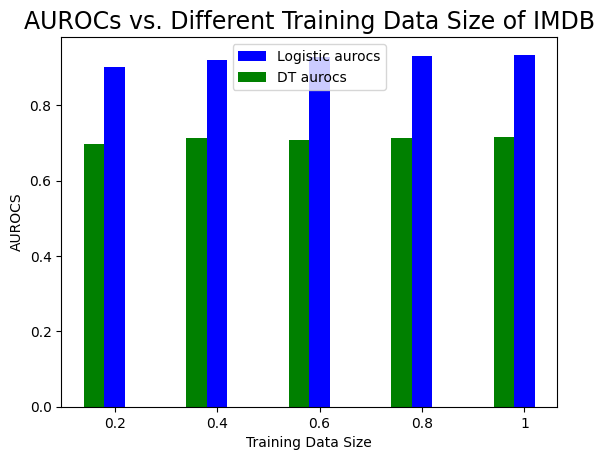

In [54]:
Log_aurocs={}
DT_aurocs={}

for i in [0.2,0.4,0.6,0.8,1]:
  if i == 1:
    IMDB_X_train_20,IMDB_y_train_20=IMDB_X_train,IMDB_y_train
  else:
    IMDB_X_train_20, IMDB_X_out, IMDB_y_train_20, IMDB_y_out = model_selection.train_test_split(IMDB_X_train,IMDB_y_train,test_size = 1-i, random_state=1, shuffle=True)
  logitreg = LogisticRegression(max_iters=1e3)
  fit = logitreg.fit(IMDB_X_train_20, IMDB_y_train_20)
  y_test_prob = fit.predict(IMDB_X_test)
  fpr, tpr, _ = roc_curve(IMDB_y_test, y_test_prob)
  auroc = roc_auc_score(IMDB_y_test, y_test_prob)
  Log_aurocs[i]=auroc

  model=DecisionTreeClassifier()
  fit = model.fit(IMDB_X_train_20, IMDB_y_train_20)
  y_test_prob = fit.predict_proba(IMDB_X_test)[:,1]
  fpr, tpr, _ = roc_curve(IMDB_y_test, y_test_prob)
  auroc = roc_auc_score(IMDB_y_test, y_test_prob)
  DT_aurocs[i]=auroc

X = np.arange(len(Log_aurocs))
ax = plt.subplot(111)
ax.bar(X, Log_aurocs.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, DT_aurocs.values(), width=0.2, color='g', align='center')
ax.legend(('Logistic aurocs','DT aurocs'))
plt.xticks(X, Log_aurocs.keys())
plt.title("AUROCs vs. Different Training Data Size of IMDB", fontsize=17)
plt.xlabel("Training Data Size")
plt.ylabel("AUROCS")
plt.show()

For different training sizes, we see that AUROC scores are always approximately 0.9, which is way greater than the AUROC scores of decision trees that is always approximately 0.7. so, simple logistic regression performs better than decision trees in binary classification. Furthermore, even though it is not obvious, but a slight increase in AUROC scores is present as training size data increases.

## Multi-Class Classification on 20 News Group Dataset

### Gradient Verification

In [55]:
from sklearn import preprocessing
import random
random.seed(551)
#whole train set
newsgroups_X_train=newsgroups_df.iloc[:,:-1][:2930].to_numpy()
newsgroups_X_train = preprocessing.scale(newsgroups_X_train) # standardize input data
newsgroups_y_train=pd.get_dummies(newsgroups_df['category'][:2930]).to_numpy()


#whole test set
newsgroups_X_test=newsgroups_df.iloc[:,:-1][2930:].values
newsgroups_X_test = preprocessing.scale(newsgroups_X_test) # standardize input data
newsgroups_y_test=pd.get_dummies(newsgroups_df['category'][2930:]).to_numpy()


In [56]:
random.seed(551)
D = newsgroups_X_train.shape[1]
C = newsgroups_y_train.shape[1]

mlr = Multinomial_logistic(D, C)
print(mlr.check_grad(newsgroups_X_train, newsgroups_y_train))

5.808800969132831e-13


The perturbation value obtained above are very small(smaller than 10e-8) therefore the loss function and gradient calculation are good.

The code below compute the error convergence plots to verify gradient and check for potential overfit for multi-class logistic regression.

iter 0: 6083.091; 2389.800
iter 1: 4211.952; 1736.550
iter 2: 3467.036; 1413.878
iter 3: 3054.120; 1238.098
iter 4: 2797.095; 1129.576
iter 5: 2617.155; 1056.762
iter 6: 2486.693; 1005.965
iter 7: 2388.441; 968.773
iter 8: 2311.638; 940.429
iter 9: 2249.695; 918.112
iter 10: 2198.420; 900.051
iter 11: 2155.010; 885.139
iter 12: 2117.514; 872.635
iter 13: 2084.607; 862.067
iter 14: 2055.518; 853.136
iter 15: 2032.254; 845.771
iter 16: 2014.241; 838.294
iter 17: 1998.615; 833.538
iter 18: 1983.262; 827.304
iter 19: 1970.569; 823.524
iter 20: 1958.112; 818.436
iter 21: 1947.777; 815.537
iter 22: 1937.296; 811.183
iter 23: 1928.710; 808.878
iter 24: 1919.809; 805.127
iter 25: 1912.515; 803.314
iter 26: 1904.713; 800.004
iter 27: 1898.408; 798.557
iter 28: 1891.534; 795.628
iter 29: 1886.054; 794.494
iter 30: 1879.936; 791.879
iter 31: 1875.155; 790.995
iter 32: 1869.697; 788.647
iter 33: 1865.515; 787.969
iter 34: 1860.612; 785.839
iter 35: 1856.934; 785.322
iter 36: 1852.500; 783.373
iter

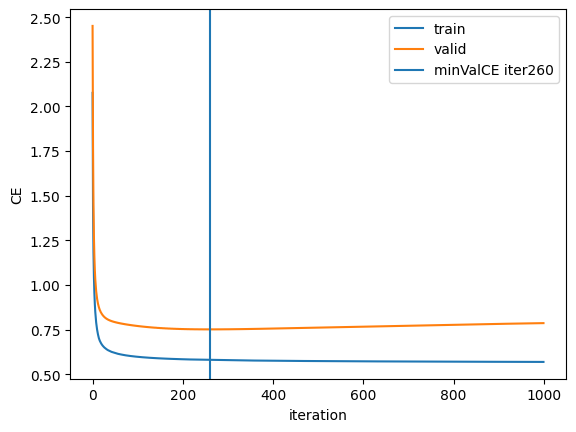

In [57]:
newsgroups_X_valid, newsgroups_X_out, newsgroups_y_valid, newsgroups_y_out = model_selection.train_test_split(newsgroups_X_test,newsgroups_y_test,test_size = 0.5, random_state=1, shuffle=True)
ce_train, ce_valid = mlr.fit(newsgroups_X_train, newsgroups_y_train, newsgroups_X_valid, newsgroups_y_valid, niter=1000)
optimal_niter = ce_valid.argmin()
plt.clf()
plt.plot(ce_train/newsgroups_X_train.shape[0], label='train')
plt.plot(ce_valid/newsgroups_X_valid.shape[0], label='valid')
plt.xlabel("iteration")
plt.ylabel("CE")
plt.axvline(x=optimal_niter, label=f"minValCE iter{optimal_niter}")
plt.legend()
# plt.show()
plt.savefig("training_ce.png", bbox_inches="tight", dpi=300)

Training error converges, so we have verified the gradient. However, we see that validation error starts to increase as the number of iterations exceeds a certain number of times. This phenomenon implies that we should prevent overfitting by not exceeding the optimal number of iterations.

### Classification Accuracies vs. Different Training Data Size

The code below tests for different classification accuracies on different training data sizes.

iter 0: 2805.966
iter 1: 1942.508
iter 2: 1521.347
iter 3: 1291.252
iter 4: 1158.680
iter 5: 1055.683
iter 6: 972.520
iter 7: 913.343
iter 8: 863.847
iter 9: 821.457
iter 10: 784.444
iter 11: 751.648
iter 12: 722.416
iter 13: 696.159
iter 14: 672.368
iter 15: 650.676
iter 16: 630.838
iter 17: 612.702
iter 18: 596.185
iter 19: 581.220
iter 20: 567.709
iter 21: 555.505
iter 22: 544.447
iter 23: 534.387
iter 24: 525.202
iter 25: 516.790
iter 26: 509.066
iter 27: 501.956
iter 28: 495.394
iter 29: 489.321
iter 30: 483.686
iter 31: 478.443
iter 32: 473.551
iter 33: 468.973
iter 34: 464.678
iter 35: 460.640
iter 36: 456.834
iter 37: 453.240
iter 38: 449.840
iter 39: 446.616
iter 40: 443.556
iter 41: 440.645
iter 42: 437.873
iter 43: 435.230
iter 44: 432.707
iter 45: 430.294
iter 46: 427.985
iter 47: 425.772
iter 48: 423.650
iter 49: 421.613
iter 50: 419.655
iter 51: 417.771
iter 52: 415.958
iter 53: 414.211
iter 54: 412.527
iter 55: 410.901
iter 56: 409.332
iter 57: 407.815
iter 58: 406.348
i

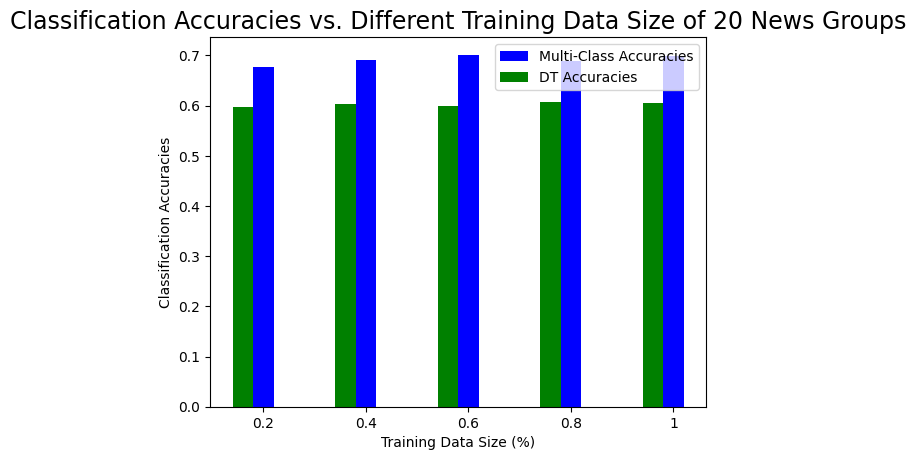

In [58]:
def evaluate(y, y_pred):
    accuracy = sum(y_pred.argmax(axis=1) == y.argmax(axis=1))
    accuracy = accuracy / y.shape[0]
    return accuracy

Multi_acc={}
DT_acc={}


D = newsgroups_X_train.shape[1]
C = newsgroups_y_train.shape[1]
for i in [0.2,0.4,0.6,0.8,1]:
  if i == 1:
    newsgroups_X_train_20,newsgroups_y_train_20=newsgroups_X_train,newsgroups_y_train
  else:
    newsgroups_X_train_20, newsgroups_X_out, newsgroups_y_train_20, newsgroups_y_out = model_selection.train_test_split(newsgroups_X_train,newsgroups_y_train,test_size = 1-i, random_state=1, shuffle=True)

  mlr = Multinomial_logistic(D, C)
  fit = mlr.fit(newsgroups_X_train_20, newsgroups_y_train_20)
  y_test_prob = mlr.predict(newsgroups_X_test)
  acc=evaluate(y_test_prob,newsgroups_y_test)
  Multi_acc[i]=acc

  model = DecisionTreeClassifier()
  model.fit(newsgroups_X_train_20, newsgroups_y_train_20)
  model_pred = model.predict(newsgroups_X_test)
  acc = model.score(newsgroups_X_test, newsgroups_y_test)
  DT_acc[i]=acc


X = np.arange(len(DT_acc))
ax = plt.subplot(111)
ax.bar(X, Multi_acc.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, DT_acc.values(), width=0.2, color='g', align='center')
ax.legend(('Multi-Class Accuracies','DT Accuracies'))
plt.xticks(X, Multi_acc.keys())
plt.title("Classification Accuracies vs. Different Training Data Size of 20 News Groups", fontsize=17)
plt.xlabel("Training Data Size (%)")
plt.ylabel("Classification Accuracies")
plt.show()



Classification accuracies of multi-class logistic regression on different training data size are always approximately 0.7, which is way better than the classification accuracies of decision trees that is approximately 0.6. So, multi-class logistic regression perform better than decision trees for multi-class classification. Furthermore, even though it is not obvious, but a light increase in accuracies is present as the training data size increases.

### Heatmap

The code below computes the heatmap for the top 25 features with the 5 chosen target classes.

iter 0: 3445.447; 1281.175
iter 1: 3022.221; 1104.942
iter 2: 2815.135; 1024.385
iter 3: 2656.074; 962.680
iter 4: 2581.560; 941.618
iter 5: 2546.975; 932.816
iter 6: 2519.613; 926.115
iter 7: 2496.950; 920.749
iter 8: 2477.650; 916.249
iter 9: 2460.884; 912.373
iter 10: 2446.103; 909.038
iter 11: 2432.929; 906.299
iter 12: 2421.097; 904.225
iter 13: 2410.412; 902.719
iter 14: 2400.730; 901.581
iter 15: 2391.939; 900.664
iter 16: 2383.947; 899.885
iter 17: 2376.670; 899.202
iter 18: 2370.040; 898.607
iter 19: 2363.996; 898.095
iter 20: 2358.464; 897.657
iter 21: 2353.369; 897.283
iter 22: 2348.641; 896.962
iter 23: 2344.224; 896.686
iter 24: 2340.073; 896.447
iter 25: 2336.154; 896.239
iter 26: 2332.440; 896.056
iter 27: 2328.906; 895.896
iter 28: 2325.535; 895.754
iter 29: 2322.312; 895.629
iter 30: 2319.222; 895.518
iter 31: 2316.253; 895.419
iter 32: 2313.397; 895.332
iter 33: 2310.644; 895.254
iter 34: 2307.986; 895.185
iter 35: 2305.417; 895.124
iter 36: 2302.931; 895.070
iter 37:

'\nW_hat = mlr.W[:-1,:] # remove the intercept\nW_hat_transformed = np.exp(W_hat)\nW_hat_transformed = W_hat_transformed / W_hat_transformed.sum(axis=0)[None,:]\n\nimport pandas as pd\niris = datasets.load_iris()\nfeature_names = iris[\'feature_names\'].copy()\nlabel_names = iris[\'target_names\'].tolist()\n\nW_hat_transformed_df = pd.DataFrame(W_hat_transformed, columns=label_names, index=feature_names)\nhmp = heatmap(W_hat_transformed_df, cmap=\'gray_r\')\nfig = hmp.get_figure()\nfig.savefig("iris_W_hat_transformed.png", bbox_inches="tight", dpi=300)'

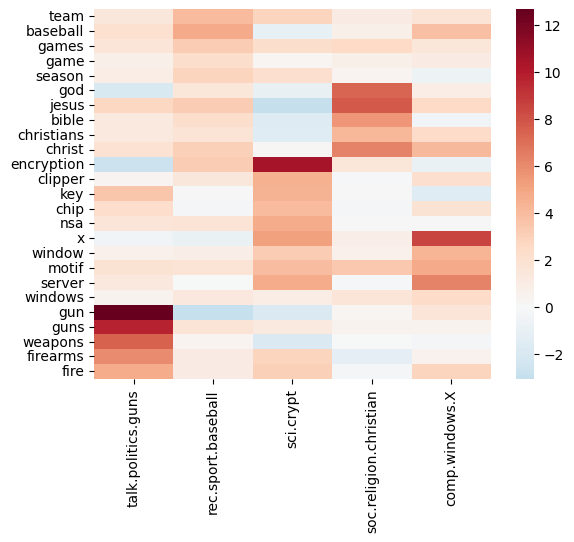

In [59]:

from seaborn import heatmap

new_newsgroups_features_df=pd.concat([baseball_mscores_df[:5],christian_mscores_df[:5],crypt_mscores_df[:5],guns_mscores_df[:5],window_mscores_df[:5]])
new_newsgroups_df=newsgroups_df[list(new_newsgroups_features_df.index)+["category"]]

from sklearn import preprocessing
import random
random.seed(551)
#whole train set
new_newsgroups_X_train=new_newsgroups_df.iloc[:,:-1][:2930].to_numpy()
new_newsgroups_X_train = preprocessing.scale(new_newsgroups_X_train) # standardize input data
new_newsgroups_y_train=pd.get_dummies(new_newsgroups_df['category'][:2930]).to_numpy()


#whole test set
new_newsgroups_X_test=new_newsgroups_df.iloc[:,:-1][2930:].values
new_newsgroups_X_test = preprocessing.scale(new_newsgroups_X_test) # standardize input data
new_newsgroups_y_test=pd.get_dummies(new_newsgroups_df['category'][2930:]).to_numpy()

random.seed(551)
new_D = new_newsgroups_X_train.shape[1]
new_C = new_newsgroups_y_train.shape[1]

new_mlr = Multinomial_logistic(new_D, new_C)


#print(mlr.check_grad(new_newsgroups_X_train, new_newsgroups_y_train))
new_newsgroups_X_valid, new_newsgroups_X_out, new_newsgroups_y_valid, new_newsgroups_y_out = model_selection.train_test_split(new_newsgroups_X_test,new_newsgroups_y_test,test_size = 0.5, random_state=1, shuffle=True)
ce_train, ce_valid = new_mlr.fit(new_newsgroups_X_train, new_newsgroups_y_train, new_newsgroups_X_valid, new_newsgroups_y_valid, niter=1000)
new_categories=['talk.politics.guns','rec.sport.baseball','sci.crypt','soc.religion.christian','comp.windows.X']
new_W_hat = new_mlr.W

desired_features=list(baseball_mscores_df[:5].index)+list(christian_mscores_df[:5].index)+list(crypt_mscores_df[:5].index)+list(window_mscores_df[:5].index)+list(guns_mscores_df[:5].index)
new_W_hat_df=pd.DataFrame(new_W_hat,columns=new_categories,index=desired_features)

hmp = heatmap(new_W_hat_df, cmap='RdBu_r', center=0)
fig = hmp.get_figure()
fig.savefig("W_hat.png")

'''
W_hat = mlr.W[:-1,:] # remove the intercept
W_hat_transformed = np.exp(W_hat)
W_hat_transformed = W_hat_transformed / W_hat_transformed.sum(axis=0)[None,:]

import pandas as pd
iris = datasets.load_iris()
feature_names = iris['feature_names'].copy()
label_names = iris['target_names'].tolist()

W_hat_transformed_df = pd.DataFrame(W_hat_transformed, columns=label_names, index=feature_names)
hmp = heatmap(W_hat_transformed_df, cmap='gray_r')
fig = hmp.get_figure()
fig.savefig("iris_W_hat_transformed.png", bbox_inches="tight", dpi=300)'''

A heatmap that shows association between classes and features is shown above. As we can see, the more a word/feature is associated to a class, the darker the color is. For example, "gun", "guns", "weapons", "firearms", and "fire" are the top 5 features associated with the target class "talk.politics.guns", so the colors in these 5 features are darker than all the other words/features. Since the 5 classes chosen are distinct, we can clearly see blocks of dark color in each class at different features and places.